# First Name:  Richard
# Last Name: Setiawan

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# From Prac 1 to 3

In [25]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [26]:
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric

In [27]:
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]
sub2=sub1.copy()

In [28]:
#SETTING MISSING DATA
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

In [29]:
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)
sub2['BEER_FEQMO']= pd.to_numeric(sub2['BEER_FEQMO'])

In [30]:
# Creating a secondary variable multiplying the days consumed beer/month and the number of beer/per day
sub2['NUMBEERMO_EST']=sub2['BEER_FEQMO'] * sub2['S2AQ5D']
sub2['NUMBEERMO_EST']= pd.to_numeric(sub2['NUMBEERMO_EST'])

In [31]:
ct1 = sub2.groupby('NUMBEERMO_EST').size()
print (ct1)

NUMBEERMO_EST
1.000000      477
2.000000      407
2.500000      414
3.000000      172
4.000000      429
             ... 
520.000000      1
540.000000      2
624.000000      1
720.000000      2
900.000000      1
Length: 75, dtype: int64


# Categorical -> Quantitative - ANOVA

In [32]:
sub2['DYSLIFE'] = sub2['DYSLIFE'].astype('category') 

# Draw boxplot to show relationship between minor depression status (DYSLIFE (categorical)) and estimated number of beer consumed (NUMBEERMO_EST (quantitative))

<IPython.core.display.Javascript object>


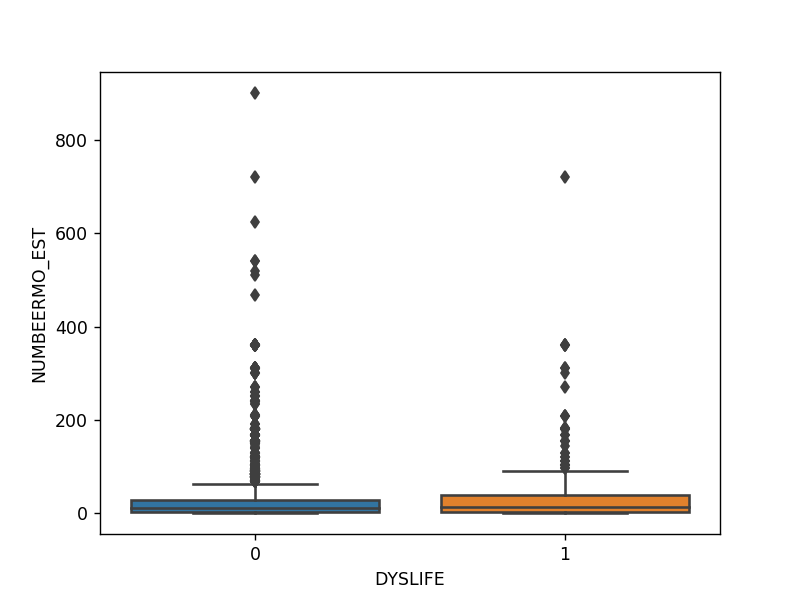

Text(0, 0.5, 'NUMBEERMO_EST')

In [45]:
%matplotlib notebook
sns.boxplot(x='DYSLIFE',y='NUMBEERMO_EST',data=sub2)
plt.xlabel('DYSLIFE')
plt.ylabel('NUMBEERMO_EST')

# Perform ANOVA analysis between minor depression status (DYSLIFE (categorical)) and estimated number of beer consumed (NUMBEERMO_EST (quantitative))

In [34]:
model1 = smf.ols(formula='NUMBEERMO_EST ~ C(DYSLIFE)',data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:          NUMBEERMO_EST   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.23
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           6.99e-06
Time:                        14:41:29   Log-Likelihood:                -38804.
No. Observations:                7303   AIC:                         7.761e+04
Df Residuals:                    7301   BIC:                         7.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.2277      0.587     

In [35]:
sub3 = sub2[['NUMBEERMO_EST', 'DYSLIFE']].dropna()

# print the mean of number of beer consumed grouped by minor depression status (use sub3)

In [36]:
print ('means for NUMBEERMO_EST by minor depression status')
m1 = sub3.groupby('DYSLIFE').mean()
print (m1)

means for NUMBEERMO_EST by minor depression status
         NUMBEERMO_EST
DYSLIFE               
0            27.227714
1            40.194719


# print the standard deviation (std) of number beer consumed grouped by minor depression status (use sub3)

In [37]:
print ('standard deviations for NUMBEERMO_EST by minor depression status')
sd1 = sub3.groupby('DYSLIFE').std()
print (sd1)

standard deviations for NUMBEERMO_EST by minor depression status
         NUMBEERMO_EST
DYSLIFE               
0            47.678467
1            75.407118


# Categorical (>2) -> Quantitative - ANOVA

In [38]:
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category') 
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

# Draw boxplot to show relationship between ethinicity (ETHRACE2A (categorical)) and estimated number of beer consumed (NUMBEERMO_EST (quantitative))

<IPython.core.display.Javascript object>


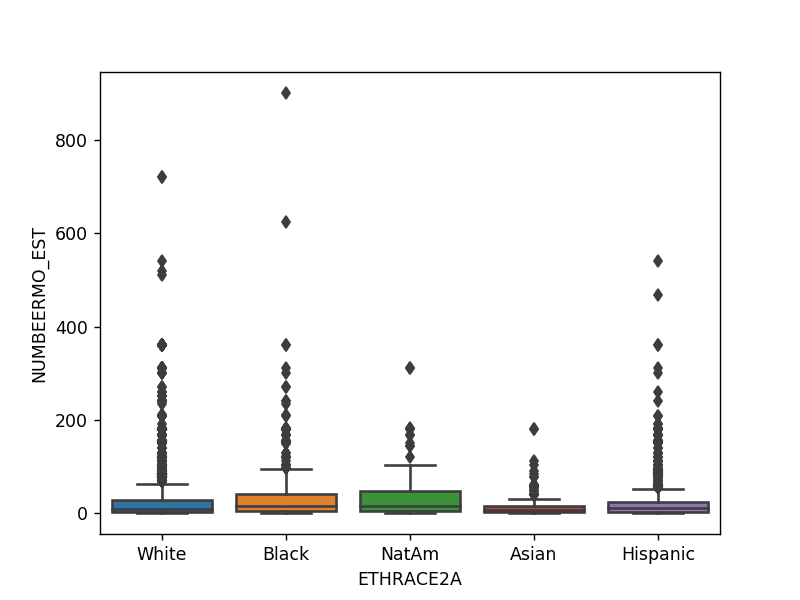

Text(0, 0.5, 'NUMBEERMO_EST')

In [39]:
%matplotlib notebook
sns.boxplot(x='ETHRACE2A',y='NUMBEERMO_EST',data=sub2)
plt.xlabel('ETHRACE2A')
plt.ylabel('NUMBEERMO_EST')

In [40]:
sub4 = sub2[['NUMBEERMO_EST', 'ETHRACE2A']].dropna()

# Perform ANOVA analysis between ethinicity (ETHRACE2A (categorical)) and estimated number of beer consumed (NUMBEERMO_EST (quantitative))

In [41]:
model2 = smf.ols(formula='NUMBEERMO_EST ~ C(ETHRACE2A)', data = sub4).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:          NUMBEERMO_EST   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.261
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.21e-06
Time:                        14:41:30   Log-Likelihood:                -38797.
No. Observations:                7303   AIC:                         7.760e+04
Df Residuals:                    7298   BIC:                         7.764e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# print the mean of number of beer consumed grouped by ethinicity

In [42]:
print ('means for NUMBEERMO_EST by ethinicity')
m2= sub4.groupby('ETHRACE2A').mean()
print (m2)

means for NUMBEERMO_EST by ethinicity
           NUMBEERMO_EST
ETHRACE2A               
White          27.858922
Black          32.443182
NatAm          39.508475
Asian          16.600000
Hispanic       24.618638


# print the standard deviation (std) of number of beer consumed grouped by ethinicity

In [43]:
print ('standard deviations for NUMBEERMO_EST  by ethnicity')
sd2 = sub4.groupby('ETHRACE2A').std()
print (sd2)

standard deviations for NUMBEERMO_EST  by ethnicity
           NUMBEERMO_EST
ETHRACE2A               
White          50.537013
Black          55.289755
NatAm          57.231386
Asian          25.572698
Hispanic       41.073842


# Perform Tukey’s Honestly Significant Difference (Post hoc) test 

In [44]:
mc1 = multi.MultiComparison(sub4['NUMBEERMO_EST'],sub4['ETHRACE2A'])
res1 = mc1.tukeyhsd()
print(res1.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   Asian    Black  15.8432  0.001   5.4332 26.2532   True
   Asian Hispanic   8.0186 0.2007  -2.1752 18.2124  False
   Asian    NatAm  22.9085  0.001   7.2827 38.5343   True
   Asian    White  11.2589  0.015   1.4533 21.0646   True
   Black Hispanic  -7.8245  0.001 -13.1332 -2.5159   True
   Black    NatAm   7.0653 0.5624  -5.9129 20.0435  False
   Black    White  -4.5843 0.0448   -9.103 -0.0655   True
Hispanic    NatAm  14.8898 0.0132   2.0844 27.6953   True
Hispanic    White   3.2403  0.175  -0.7553  7.2359  False
   NatAm    White -11.6496 0.0816 -24.1482  0.8491  False
---------------------------------------------------------
